# Información de general del Dataset

## Importación de las librerías

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl


## Importación de datos

In [5]:
# Cargamos los datos
df = pd.read_csv('./BTCUSDT1h-18.8.17-31-7-22.csv', index_col=0, parse_dates=True)
df=df.drop(columns=['ignore'])
df=df.drop(columns=['open_time'])
df=df.drop(columns=['close_time'])

In [6]:
df


,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 00:59:59.999,4285.08,4340.62,4228.76,4286.53,82.435474,3.535044e+05,268,70.703594,3.032123e+05
2017-08-18 01:59:59.999,4269.36,4269.36,4134.61,4243.59,75.684883,3.183275e+05,243,45.573568,1.924075e+05
2017-08-18 02:59:59.999,4251.95,4298.64,4234.00,4267.59,54.071337,2.304786e+05,219,46.316836,1.973981e+05
2017-08-18 03:59:59.999,4244.77,4308.70,4234.00,4292.39,64.001349,2.734950e+05,306,52.061572,2.225602e+05
2017-08-18 04:59:59.999,4292.39,4292.39,4234.43,4287.92,50.797515,2.165126e+05,267,45.826187,1.953660e+05
...,...,...,...,...,...,...,...,...,...
2022-07-30 20:59:59.999,23923.74,24078.94,23808.76,23963.03,8368.642780,2.002667e+08,236616,4165.534560,9.968639e+07
2022-07-30 21:59:59.999,23963.03,24005.00,23836.46,23860.51,3719.159970,8.893710e+07,135696,1857.729650,4.442882e+07
2022-07-30 22:59:59.999,23860.51,23863.12,23502.25,23700.98,9444.710130,2.232761e+08,244551,4611.208340,1.089986e+08


### Definición del la frequencia

In [7]:
df=df.asfreq('1h')
df=df.fillna(method='ffill')
df.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
qav                0
num_trades         0
taker_base_vol     0
taker_quote_vol    0
dtype: int64

## Análisis estadístico de los datos


### Revisar los datos: head()

Puede revisar las primeras 20 filas de sus datos utilizando la función `head()` en el DataFrame de Pandas. Puede ver que la primera columna enumera el número de fila, lo cual es útil para hacer referencia a una observación específica.

In [8]:
df.head()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
Date,,,,,,,,,
2017-08-18 00:59:59.999,4285.08,4340.62,4228.76,4286.53,82.435474,353504.410409,268.0,70.703594,303212.284309
2017-08-18 01:59:59.999,4269.36,4269.36,4134.61,4243.59,75.684883,318327.529415,243.0,45.573568,192407.488931
2017-08-18 02:59:59.999,4251.95,4298.64,4234.00,4267.59,54.071337,230478.628087,219.0,46.316836,197398.076557
2017-08-18 03:59:59.999,4244.77,4308.70,4234.00,4292.39,64.001349,273495.006480,306.0,52.061572,222560.204200
2017-08-18 04:59:59.999,4292.39,4292.39,4234.43,4287.92,50.797515,216512.633035,267.0,45.826187,195365.989365


### Dimensiones de los datos: shape

Puede revisar la forma y el tamaño de su conjunto de datos imprimiendo la propiedad shape en el DataFrame de Pandas. Los resultados se enumeran en filas y luego en columnas.

In [9]:
df.shape

(43393, 9)

### Tipos de atributos: dtypes

Puede enumerar los tipos de datos utilizados por el DataFrame para caracterizar cada atributo utilizando la propiedad `dtypes`.

In [10]:
df.dtypes

open               float64
high               float64
low                float64
close              float64
volume             float64
qav                float64
num_trades         float64
taker_base_vol     float64
taker_quote_vol    float64
dtype: object

### Resumen estadístico: describe()

Puedes ver que obtienes muchos datos. Notará algunas llamadas como `pandas.set_option()` utilizada para cambiar la precisión de los números y el ancho preferido de la salida. Esto es para que sea más legible para este ejemplo. Al describir sus datos de esta manera, vale la pena tomarse un tiempo y revisar las observaciones de los resultados.

In [11]:
# Statistical Summary
pd.set_option('display.width', 100)
pd.set_option('display.precision', 3)
df.describe()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
count,43393.000,43393.000,43393.000,43393.000,43393.000,4.339e+04,43393.000,43393.000,4.339e+04
mean,19429.668,19544.753,19306.764,19429.892,2217.202,4.918e+07,35789.448,1102.261,2.429e+07
std,17415.647,17514.725,17310.704,17415.529,2439.753,7.513e+07,42941.442,1199.142,3.698e+07
min,2870.900,2950.000,2817.000,2919.000,0.053,2.179e+02,3.000,0.004,1.470e+01
25%,7101.030,7140.780,7060.010,7101.940,947.005,7.941e+06,8831.000,481.015,4.098e+06
50%,9897.050,9956.620,9846.460,9897.130,1576.378,1.902e+07,21539.000,791.279,9.478e+06
75%,33892.820,34183.180,33652.000,33891.910,2674.012,6.404e+07,47510.000,1330.341,3.127e+07
max,68635.120,69000.000,68451.190,68633.690,137207.189,3.006e+09,799206.000,68611.450,1.503e+09


### Correlaciones: corr()

Puede usar la función corr() para calcular una matriz de correlación. La matriz enumera todos los atributos en la parte superior y lateral, para dar correlación entre todos los pares de atributos (dos veces, porque la matriz es simétrica). Puede ver que la línea diagonal a través de la matriz desde las esquinas superior izquierda a inferior derecha de la matriz muestra una correlación perfecta de cada atributo consigo mismo.

In [12]:
# Pairwise Pearson correlations
df.corr()

,open,high,low,close,volume,qav,num_trades,taker_base_vol,taker_quote_vol
open,1.000,1.000,1.000,1.000,0.144,0.604,0.549,0.138,0.603
high,1.000,1.000,1.000,1.000,0.147,0.608,0.552,0.141,0.607
low,1.000,1.000,1.000,1.000,0.140,0.600,0.545,0.134,0.599
close,1.000,1.000,1.000,1.000,0.144,0.604,0.549,0.138,0.604
volume,0.144,0.147,0.140,0.144,1.000,0.737,0.762,0.991,0.732
qav,0.604,0.608,0.600,0.604,0.737,1.000,0.909,0.729,0.995
num_trades,0.549,0.552,0.545,0.549,0.762,0.909,1.000,0.755,0.906
taker_base_vol,0.138,0.141,0.134,0.138,0.991,0.729,0.755,1.000,0.735
taker_quote_vol,0.603,0.607,0.599,0.604,0.732,0.995,0.906,0.735,1.000


### Matriz de correlación

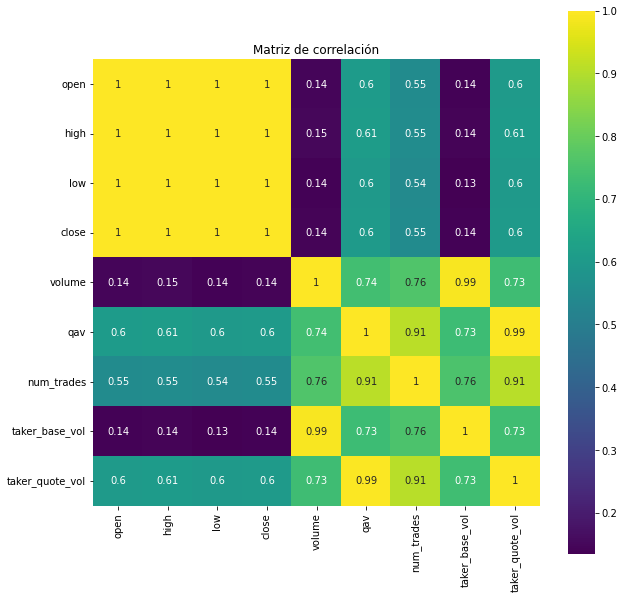

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation = df.corr()
plt.figure (figsize=(10,10))
ax= sns.heatmap(correlation, vmax=1, square= True, annot= True, cmap='viridis')
plt.title("Matriz de correlación")
plt.show()

### Asimetría: skew()

Puede calcular el sesgo de cada atributo utilizando la función skew(). El resultado de inclinación muestra una inclinación positiva (derecha) o negativa (izquierda). Los valores más cercanos a cero muestran menos sesgo.

In [14]:
df.skew()

open               1.074
high               1.071
low                1.076
close              1.074
volume             8.119
qav                5.422
num_trades         3.458
taker_base_vol     8.279
taker_quote_vol    5.391
dtype: float64

## Análisis de la distribución

### The QQ Plot

In [15]:
import scipy.stats

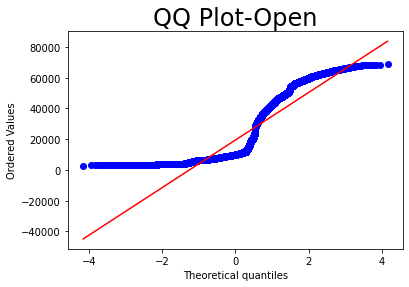

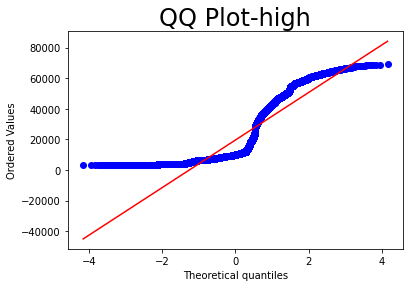

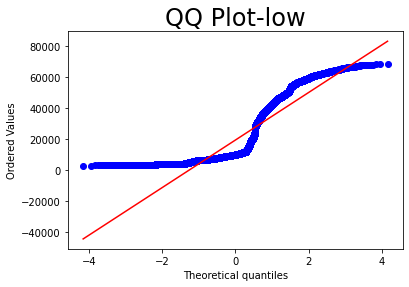

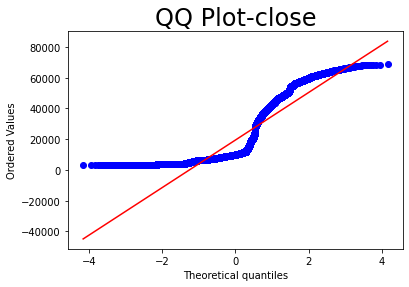

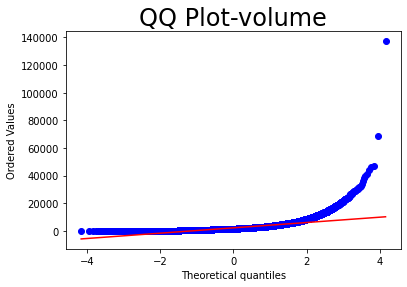

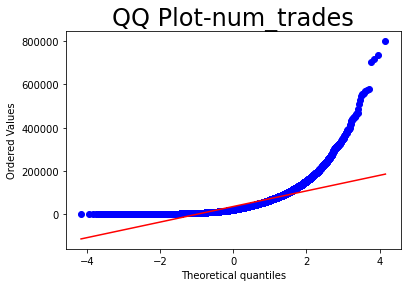

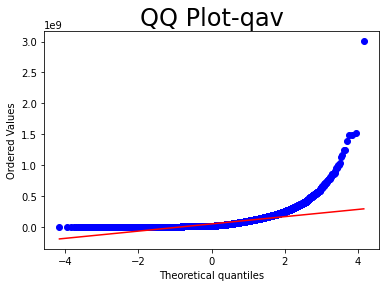

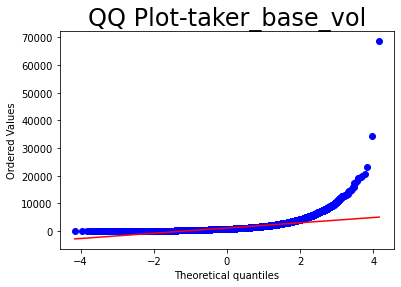

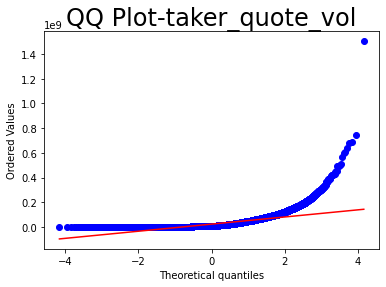

In [16]:
scipy.stats.probplot(df.open, plot =  plt)
plt.title("QQ Plot-Open", size = 24)
plt.show()

scipy.stats.probplot(df.high, plot =  plt)
plt.title("QQ Plot-high", size = 24)
plt.show()

scipy.stats.probplot(df.low, plot =  plt)
plt.title("QQ Plot-low", size = 24)
plt.show()

scipy.stats.probplot(df.close, plot =  plt)
plt.title("QQ Plot-close", size = 24)
plt.show()

scipy.stats.probplot(df.volume, plot =  plt)
plt.title("QQ Plot-volume", size = 24)
plt.show()

scipy.stats.probplot(df.num_trades, plot =  plt)
plt.title("QQ Plot-num_trades", size = 24)
plt.show()

scipy.stats.probplot(df.qav, plot =  plt)
plt.title("QQ Plot-qav", size = 24)
plt.show()

scipy.stats.probplot(df.taker_base_vol, plot =  plt)
plt.title("QQ Plot-taker_base_vol", size = 24)
plt.show()

scipy.stats.probplot(df.taker_quote_vol, plot =  plt)
plt.title("QQ Plot-taker_quote_vol", size = 24)
plt.show()


## Matriz de dispersión

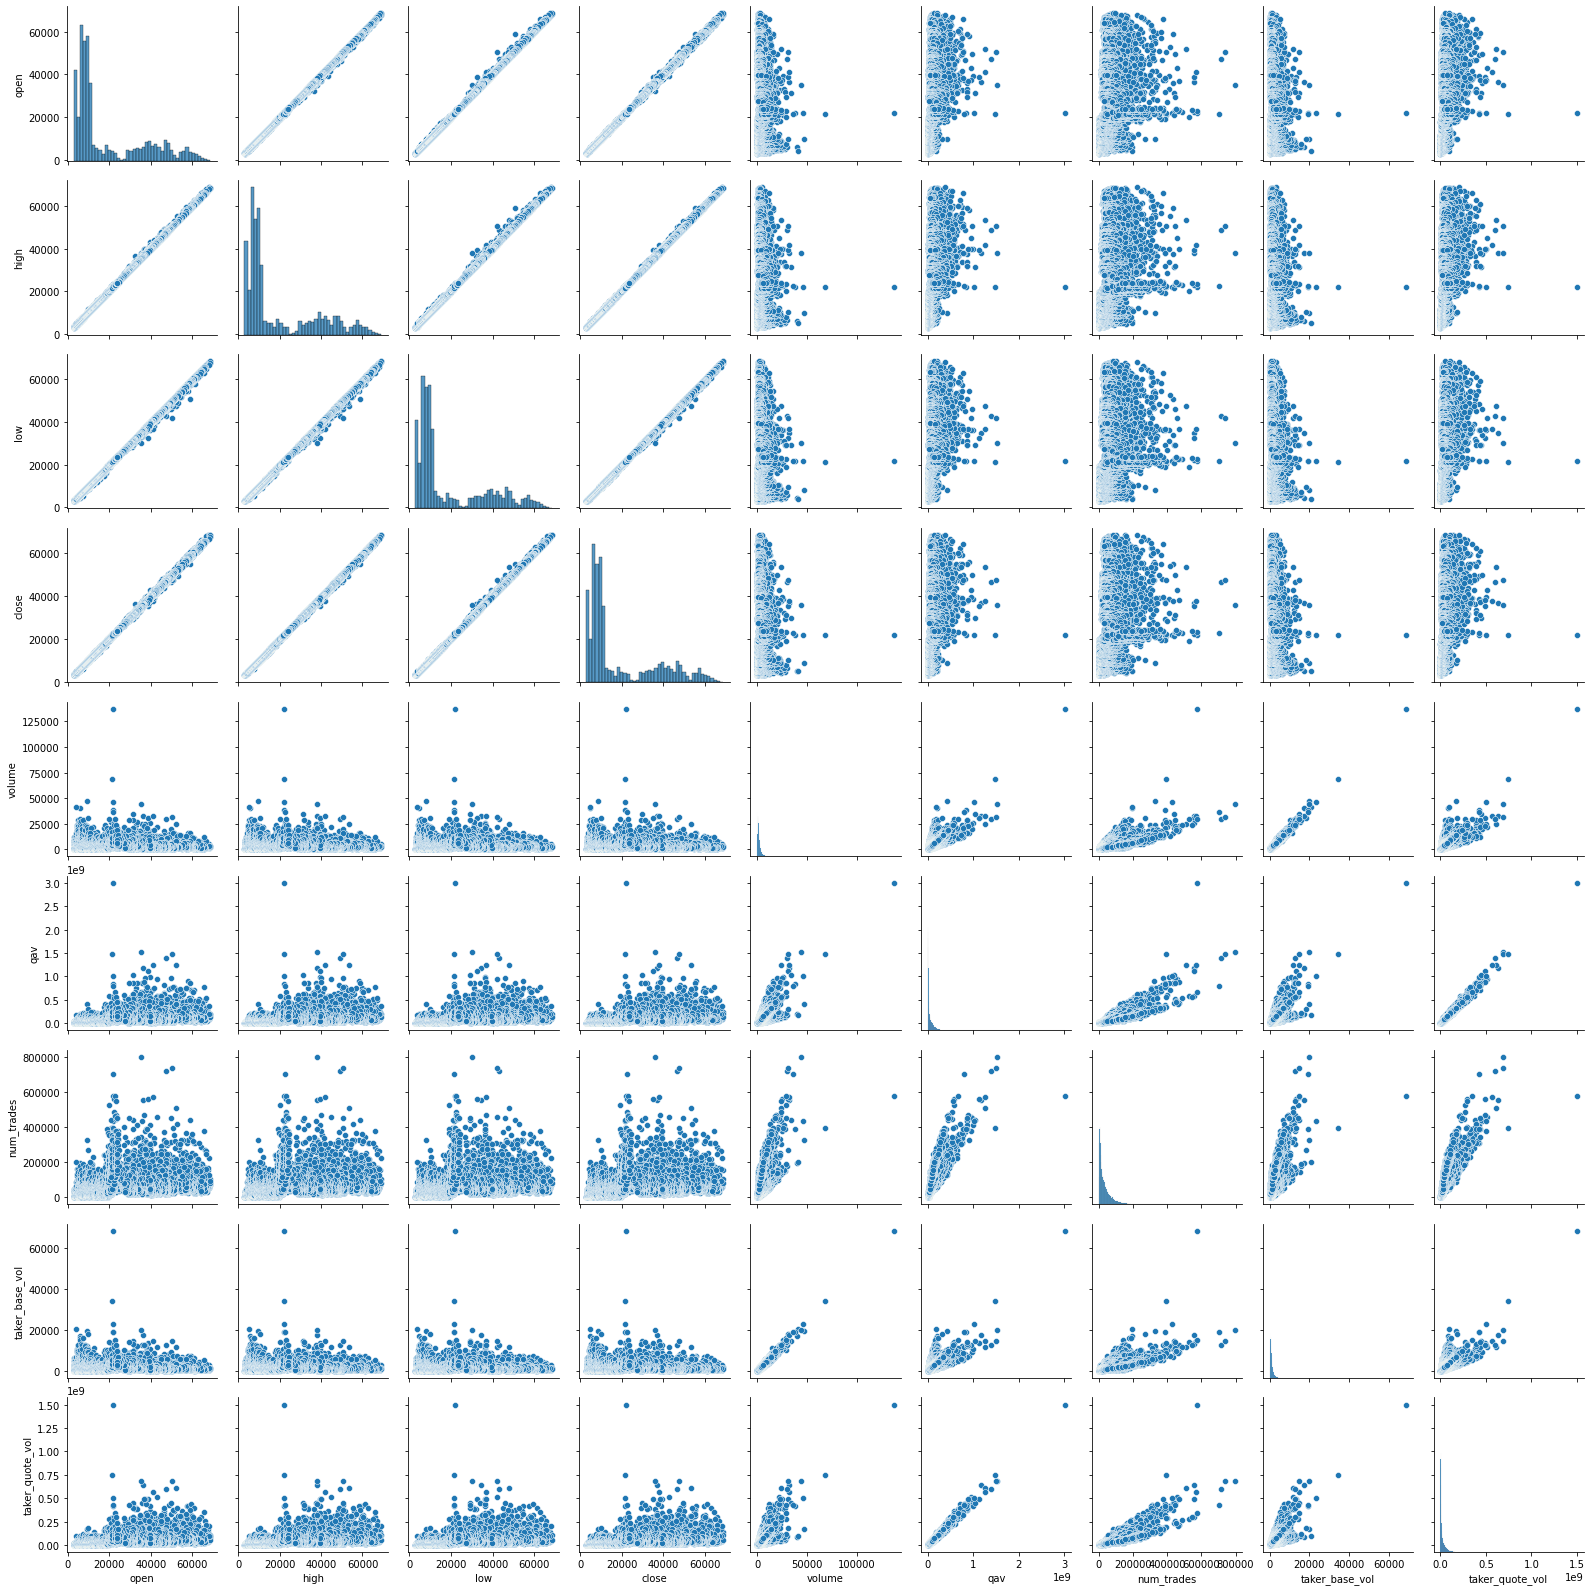

In [17]:
%matplotlib inline
# Correlatioin matrix Seaborn
sns.pairplot(df)

# Representación gráfica del análisis histórico de datos del BTC-USDT entre el 18-08-2017 y el 31-07-2022


---

## Visualización de los datos

## Visualización de los datos

Visualización de los precios Open, Hight, Low, y Close

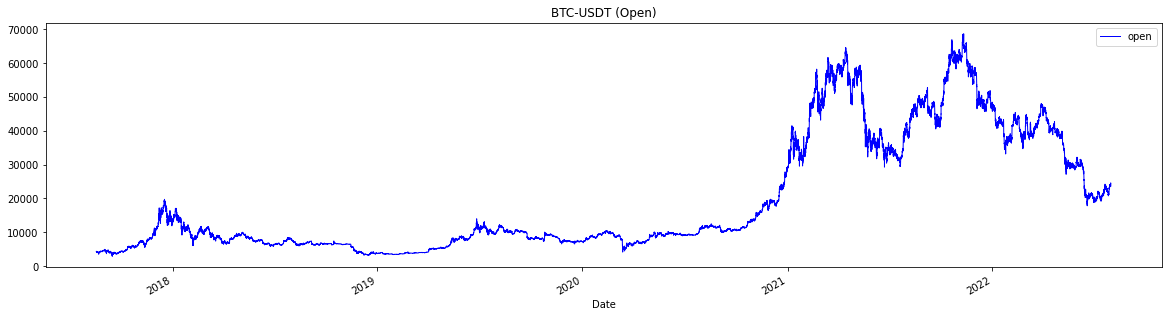

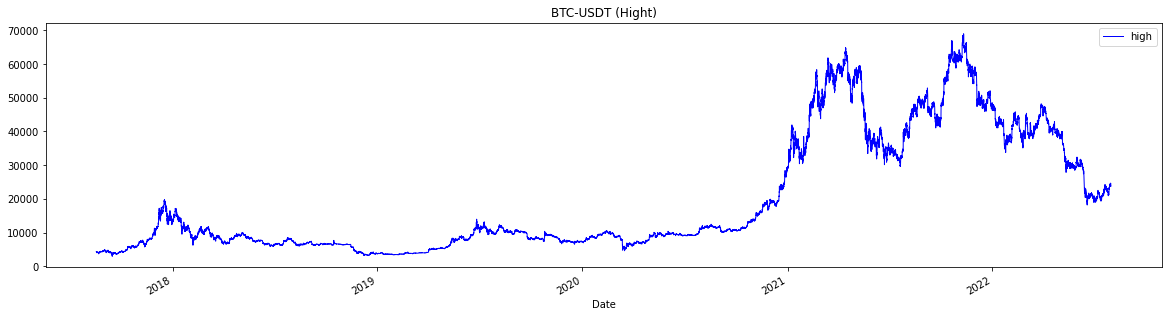

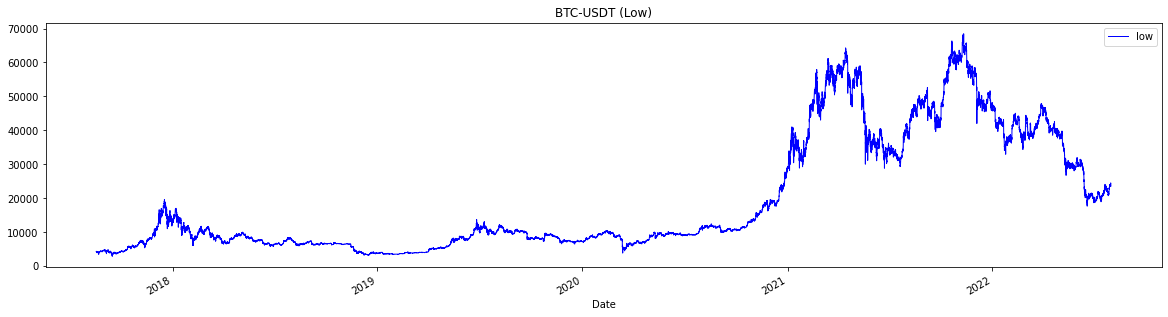

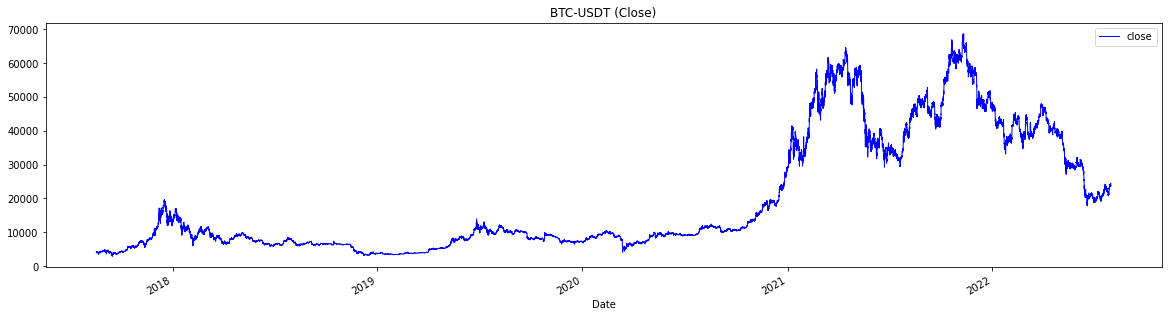

In [18]:
df.plot.line(title='BTC-USDT (Open)',y='open',figsize=(20,5),lw=1, color="blue")
df.plot.line(title='BTC-USDT (Hight)',y='high',figsize=(20,5),lw=1, color="blue")
df.plot.line(title='BTC-USDT (Low)',y='low',figsize=(20,5),lw=1, color="blue")
df.plot.line(title='BTC-USDT (Close)',y='close',figsize=(20,5),lw=1, color="blue")

Visualización del qav

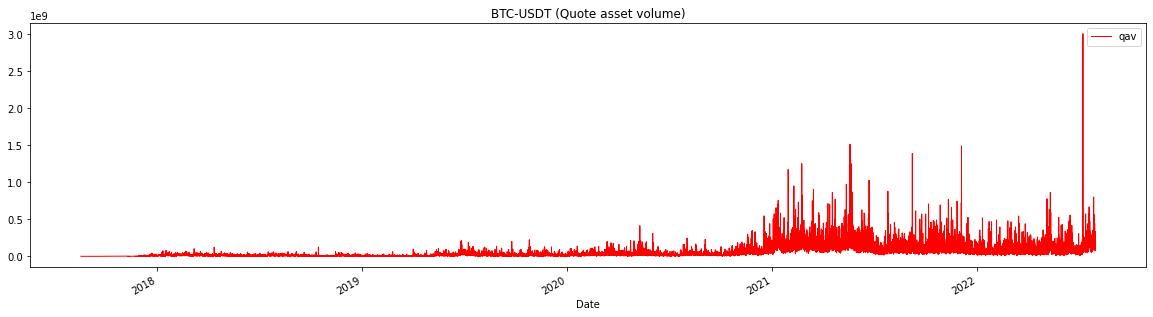

In [19]:
df.plot.line(title='BTC-USDT (Quote asset volume)',y='qav',figsize=(20,5),lw=1, color="red")

Visualización del número de transacciones (num_trades)


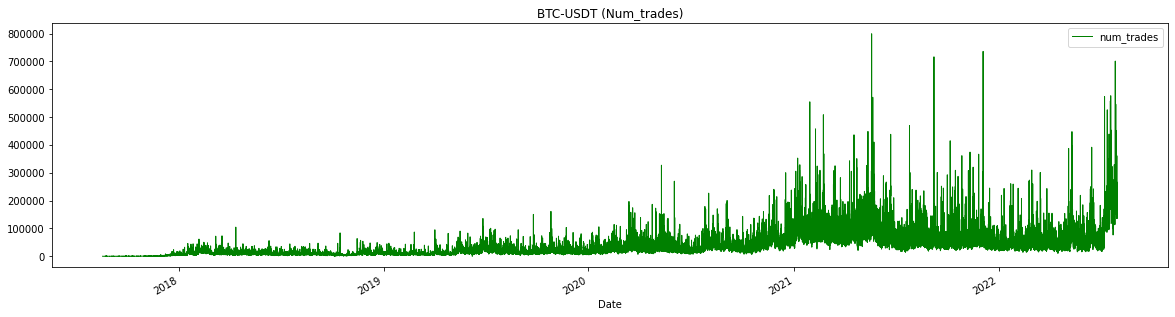

In [20]:
df.plot.line(title='BTC-USDT (Num_trades)',y='num_trades',figsize=(20,5),lw=1, color="green")

Visualización del número de transacciones (taker_base_vol)

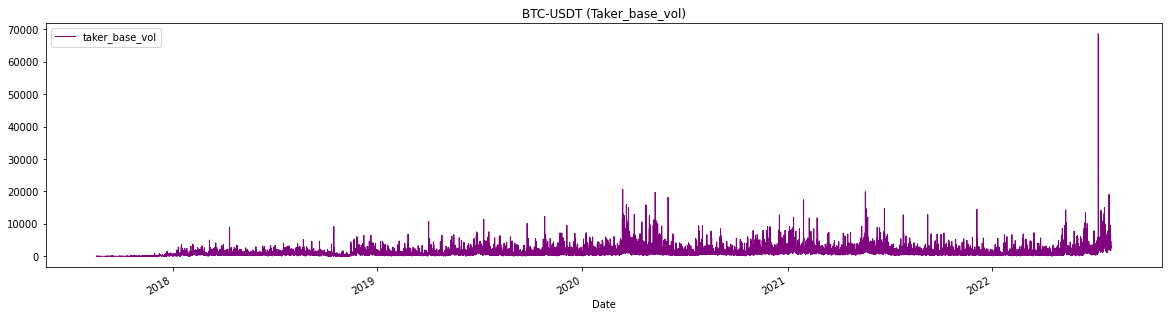

In [21]:
df.plot.line(title='BTC-USDT (Taker_base_vol)',y='taker_base_vol',figsize=(20,5),lw=1, color="purple")

Visualización del número de transacciones (taker_quote_vol)

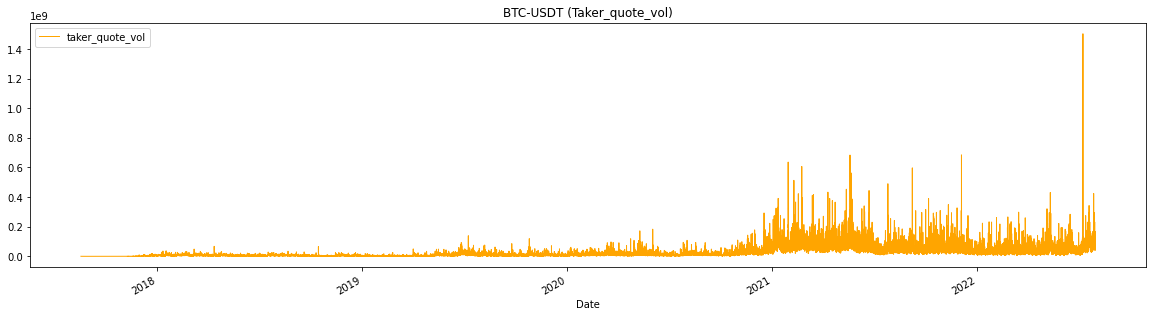

In [22]:
df.plot.line(title='BTC-USDT (Taker_quote_vol)',y='taker_quote_vol',figsize=(20,5),lw=1, color="orange")

# Análisis de la estacionaridad test Dickey-Fuller

## Importar librerias

In [23]:
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt 


Dickey-Fuller de Open


In [24]:
sts.adfuller(df.open)

(-1.332467268557597,
 0.6141907463072759,
 49,
 43343,
 {'1%': -3.430500882203011,
  '5%': -2.8616066866093077,
  '10%': -2.566805495115904},
 588986.2792234771)


Dickey-Fuller de High


In [25]:
sts.adfuller(df.high)

(-1.3144379078690216,
 0.622541340692194,
 53,
 43339,
 {'1%': -3.430500896129603,
  '5%': -2.861606692764398,
  '10%': -2.566805498392086},
 577610.6234829518)

Dickey-Fuller de Low


In [26]:
sts.adfuller(df.low)

(-1.3384056679558989,
 0.6114237403867233,
 51,
 43341,
 {'1%': -3.4305008891659856,
  '5%': -2.861606689686711,
  '10%': -2.5668054967539193},
 594426.3081419055)

Dickey-Fuller de Close


In [27]:
sts.adfuller(df.close)

(-1.332607536582087,
 0.6141254812894306,
 49,
 43343,
 {'1%': -3.430500882203011,
  '5%': -2.8616066866093077,
  '10%': -2.566805495115904},
 588998.9740513195)

Dickey-Fuller de Volumen


In [28]:
sts.adfuller(df.volume)

(-11.840152948820434,
 7.623419053616723e-22,
 54,
 43338,
 {'1%': -3.4305008996116526,
  '5%': -2.8616066943033482,
  '10%': -2.5668054992112257},
 765529.8465003956)

Dickey-Fuller de QAV


In [29]:
sts.adfuller(df.qav)

(-7.759393171704595,
 9.544239930376197e-12,
 54,
 43338,
 {'1%': -3.4305008996116526,
  '5%': -2.8616066943033482,
  '10%': -2.5668054992112257},
 1645161.2886251165)

Dickey-Fuller de Num_trades


In [30]:
sts.adfuller(df.num_trades)

(-5.807306196655687,
 4.4852332427821214e-07,
 54,
 43338,
 {'1%': -3.4305008996116526,
  '5%': -2.8616066943033482,
  '10%': -2.5668054992112257},
 985456.438536358)

Dickey-Fuller de Taker_base_vol


In [31]:
sts.adfuller(df.taker_base_vol)

(-12.195237077013903,
 1.2589683110046603e-22,
 48,
 43344,
 {'1%': -3.430500878721765,
  '5%': -2.8616066850707127,
  '10%': -2.5668054942969527},
 704629.352901631)

Dickey-Fuller de Taker_quote_vol


In [32]:
sts.adfuller(df.taker_quote_vol)

(-7.8850920346145355,
 4.592379521067259e-12,
 50,
 43342,
 {'1%': -3.430500885684418,
  '5%': -2.861606688147974,
  '10%': -2.5668054959348927},
 1584453.5958719004)

# Análisis de la estacionalidad

## Importar librerias

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

Evaluación de la estacionalidad del Open de forma aditiva y de forma multiplicativa

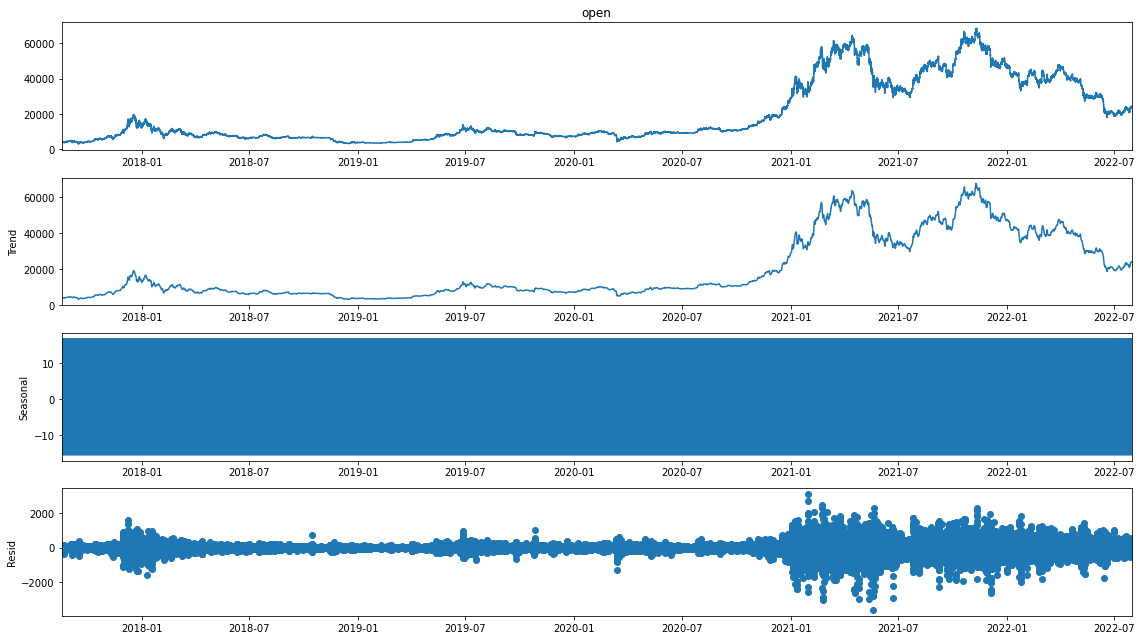

In [34]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['open'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

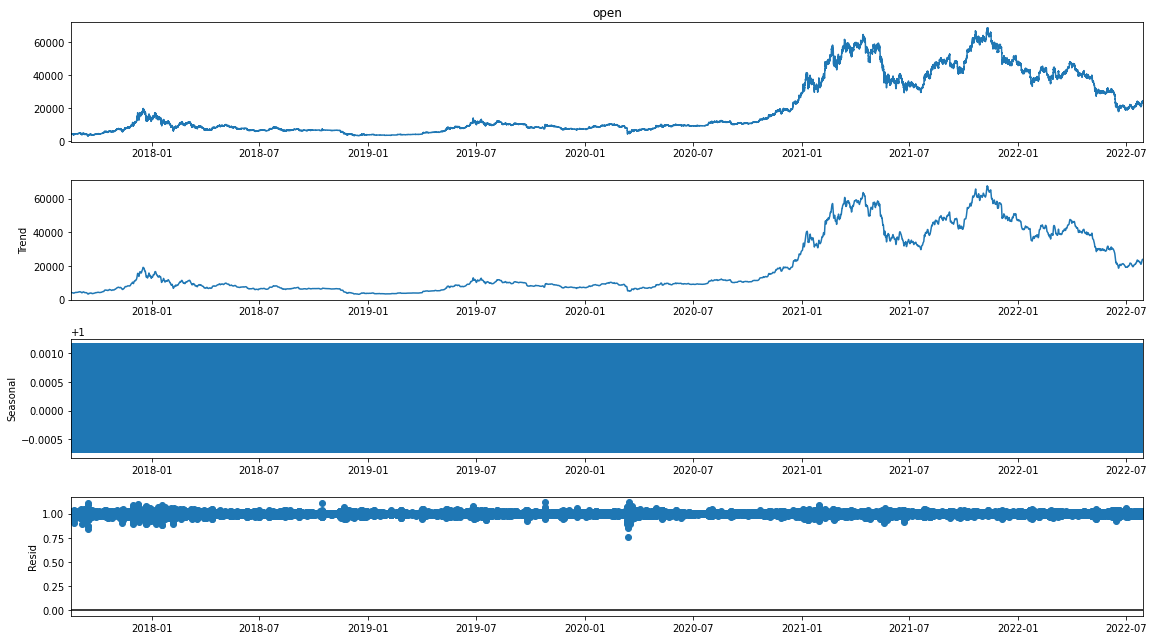

In [35]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['open'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Evaluación de la estacionalidad del Quote asset volume (QAV)

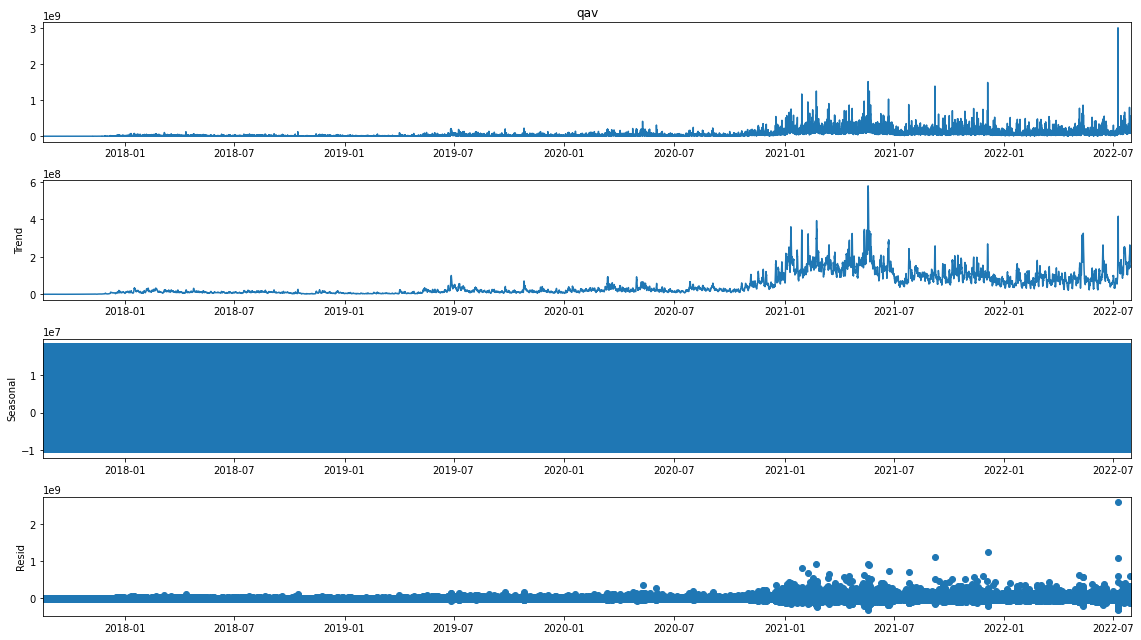

In [36]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['qav'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

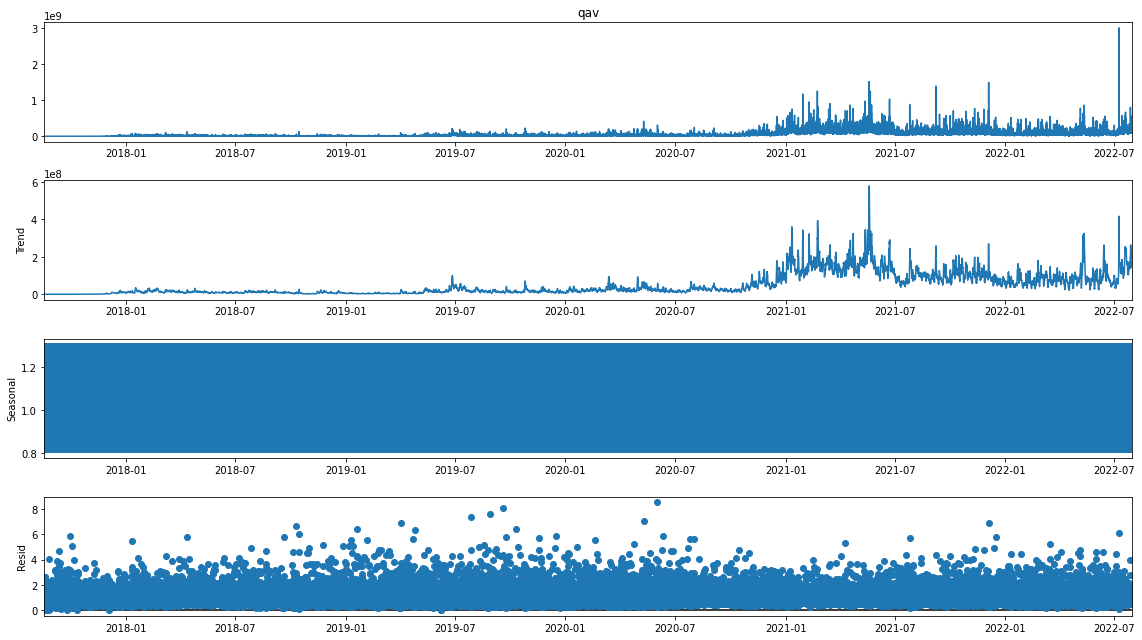

In [37]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['qav'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Evaluación de la estacionalidad del Número de trades (num_trades)

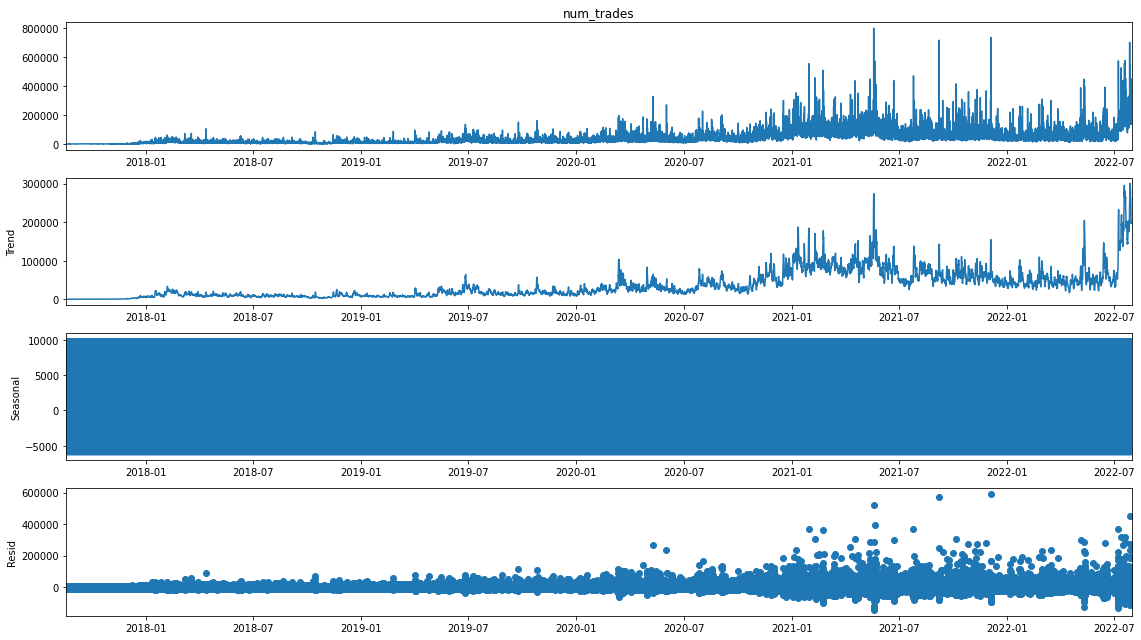

In [38]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['num_trades'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

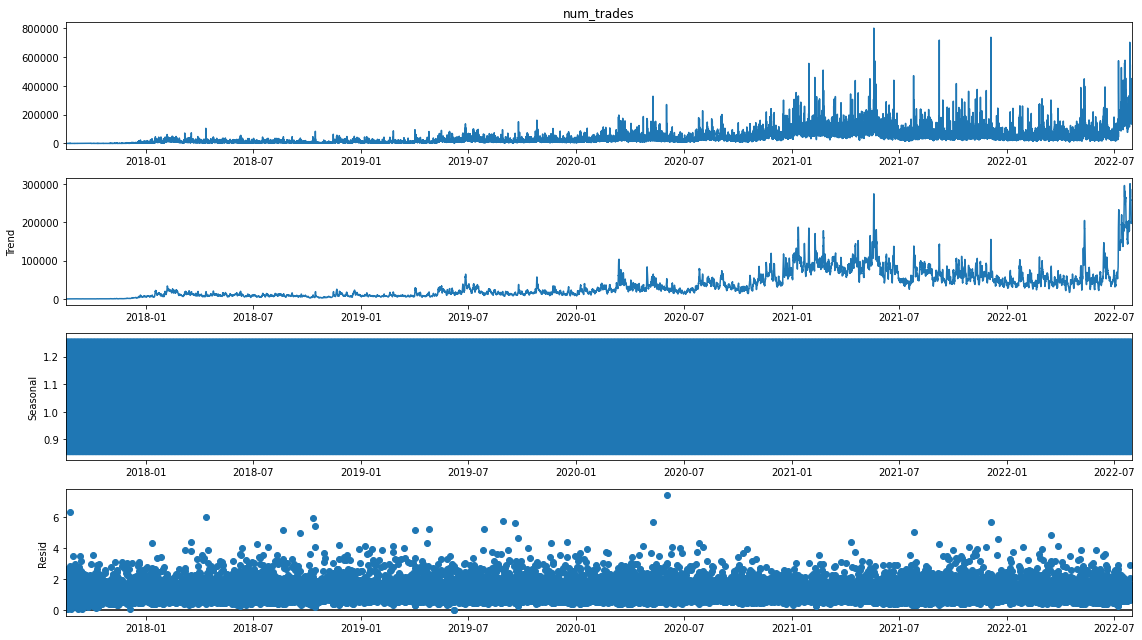

In [39]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['num_trades'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Evaluación de la estacionalidad del Taker buy base asset volume (taker_base_vol)

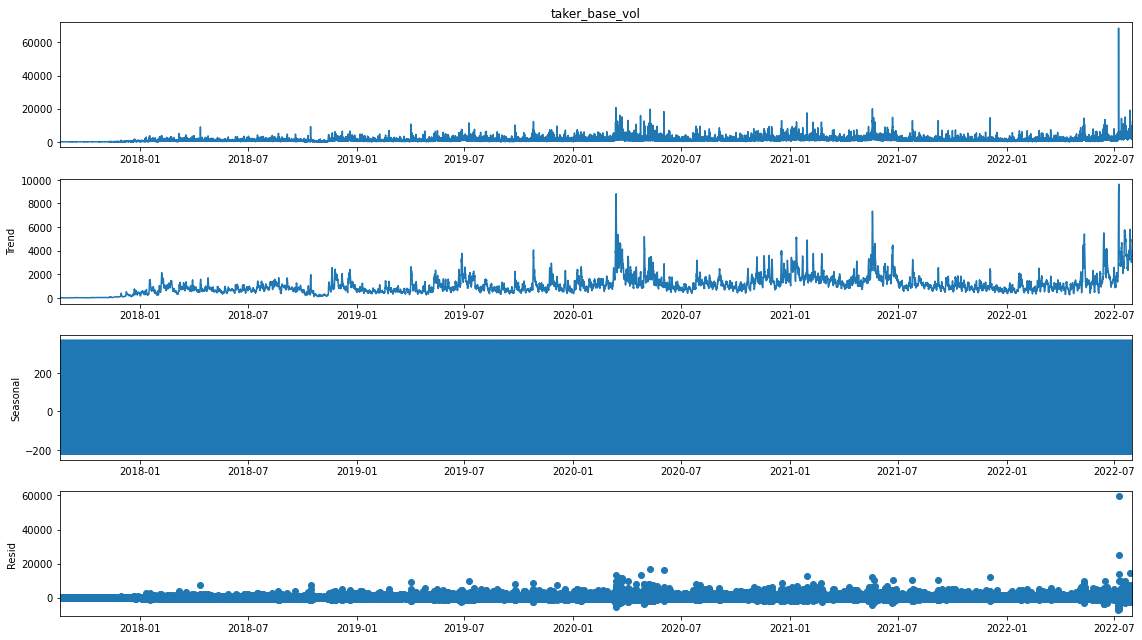

In [40]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['taker_base_vol'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

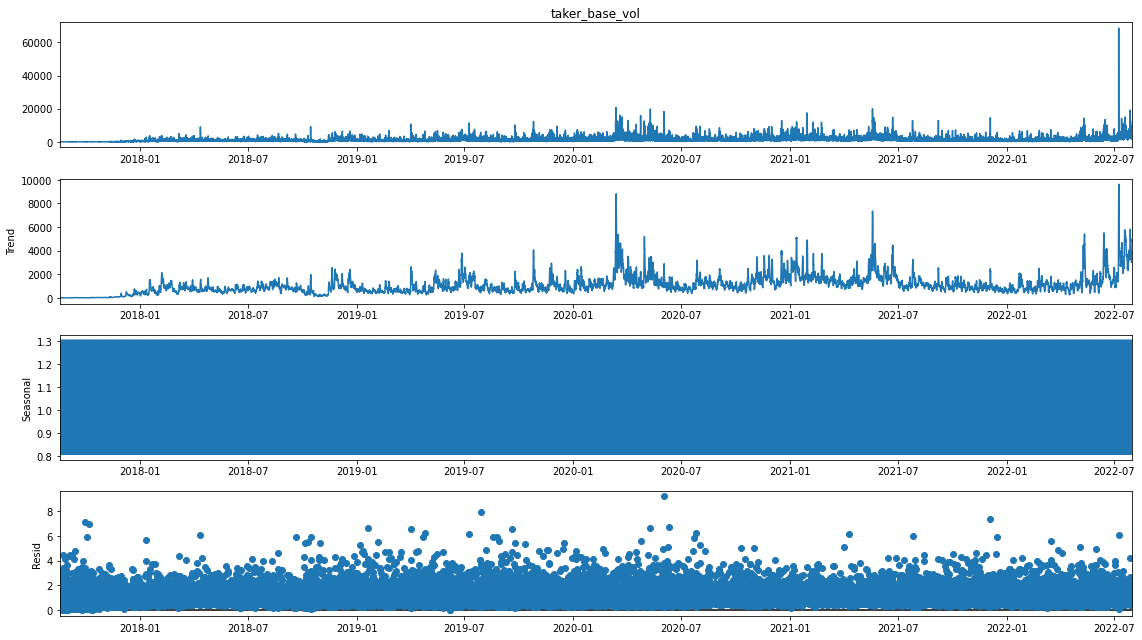

In [41]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['taker_base_vol'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

Evaluación de la estacionalidad del Taker buy quote asset volume (taker_quote_vol)

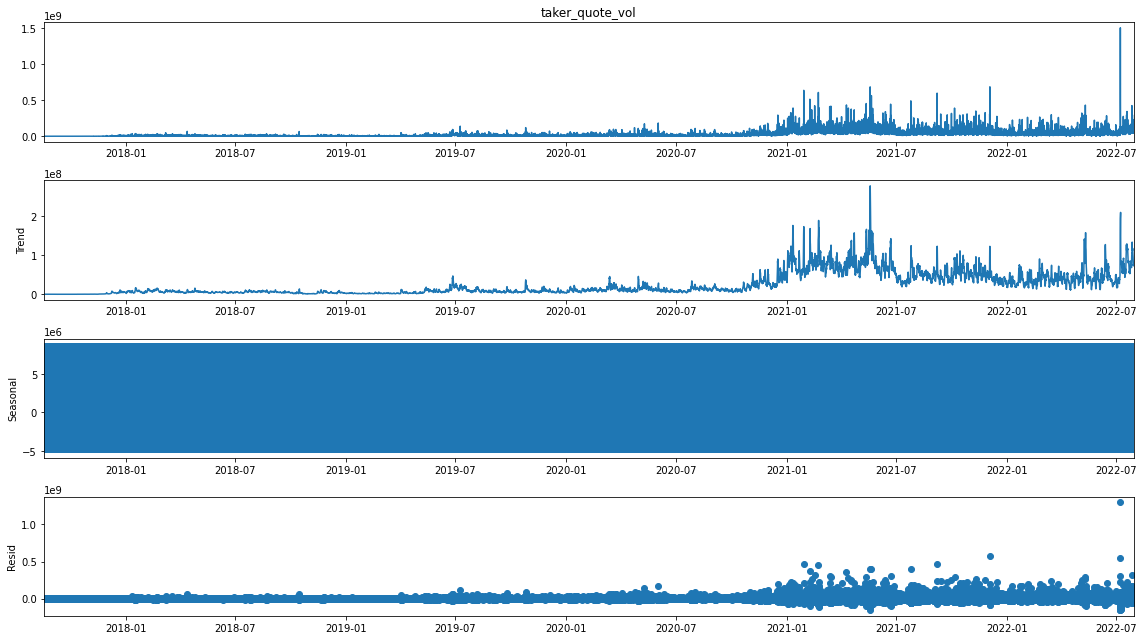

In [42]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['taker_quote_vol'], model='additive')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

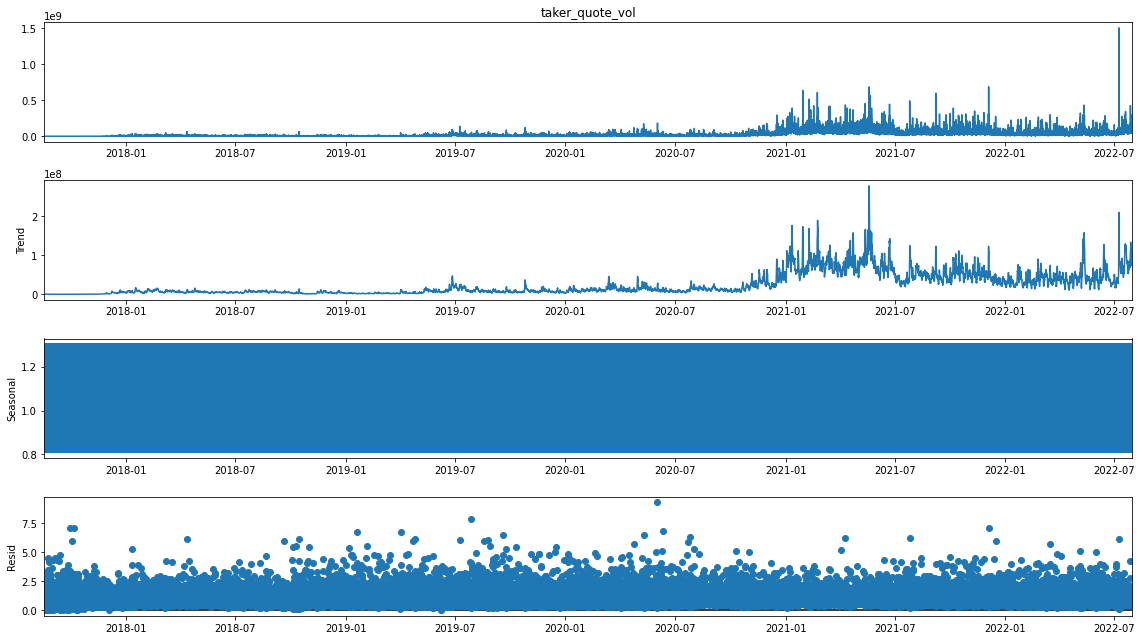

In [43]:
df.sort_index(inplace=True)
result = seasonal_decompose(df['taker_quote_vol'], model='multiplicative')  
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()